## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the total amount of items in the dataframe
len(mouse_study_df)

1893

In [3]:
# Checking the number of mice.
mouse_num = mouse_study_df["Mouse ID"].nunique()
mouse_num

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = mouse_study_df[mouse_study_df.isin(mouse_study_df[mouse_study_df.duplicated()])].sort_values(["Mouse ID","Timepoint"])
duplicate_mouse_ID_na = duplicate_mouse_ID.dropna()
duplicate_mouse_ID_na

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21.0,26.0,0.0,45.0,0.0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

look_up_duplicate = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]
look_up_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] != "g989"]
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_num_clean = mouse_study_clean_df["Mouse ID"].nunique()
mouse_num_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Grouping the dataframe by Drug Regimen and finding the mean
tumor_mean = mouse_study_clean_df.groupby("Drug Regimen").mean()
# Taking the Tumor Volume column and putting into a variable
tumor_volume_mean = tumor_mean["Tumor Volume (mm3)"]

# Grouping the dataframe by Drug Regimen and finding the median
tumor_median = mouse_study_clean_df.groupby("Drug Regimen").median()
# Taking the Tumor Volume column and putting into a variable
tumor_volume_median = tumor_median["Tumor Volume (mm3)"]

# Grouping the dataframe by Drug Regimen and finding the variance
tumor_var = mouse_study_clean_df.groupby("Drug Regimen").var()
# Taking the Tumor Volume column and putting into a variable
tumor_volume_var = tumor_var["Tumor Volume (mm3)"]

# Square rooting the variance to find the standard deviation
tumor_volume_std = tumor_volume_var**(1/2)

# Grouping the dataframe by Drug Regimen and finding the variance
tumor_sem = mouse_study_clean_df.groupby("Drug Regimen").sem()
# Taking the Tumor Volume column and putting into a variable
tumor_volume_sem = tumor_sem["Tumor Volume (mm3)"]

# Merge the different columns into a dataframe 
merge_tumor_volume_mean_and_median = pd.merge(tumor_volume_mean,tumor_volume_median, on = "Drug Regimen" , how = "outer")
merge_tumor_volume_var_and_std = pd.merge(tumor_volume_var,tumor_volume_std, on = "Drug Regimen" , how = "outer")
summary_regimen_df = pd.merge(merge_tumor_volume_mean_and_median,merge_tumor_volume_var_and_std, on = "Drug Regimen", how = "outer")
summary_regimen_final_df = pd.merge(summary_regimen_df,tumor_volume_sem, on = "Drug Regimen", how = "outer")

# Renaming the columns 
summary_regimen_final_df = summary_regimen_final_df.rename(columns = {"Tumor Volume (mm3)_x_x" : "Mean", "Tumor Volume (mm3)_y_x" : "Median", "Tumor Volume (mm3)_x_y" : "Variance", "Tumor Volume (mm3)_y_y" : "Standard Deviation", "Tumor Volume (mm3)": "SEM"})

# Displaying the final dataframe
summary_regimen_final_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_summary_groupby = mouse_study_clean_df.groupby("Drug Regimen")
single_summary_regimen_df = single_summary_groupby.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]

# Renaming the columns 
single_summary_regiment_final_df = single_summary_regimen_df.rename(columns = {"mean":"Mean","median" : "Median", "var" : "Variance", "std" : "Standard Deviation", "sem": "SEM"})

# Displaying the final dataframe
single_summary_regiment_final_df

C:\Users\Nhan Tran\AppData\Local\Temp\ipykernel_17348\432178644.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  single_summary_regimen_df = single_summary_groupby.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

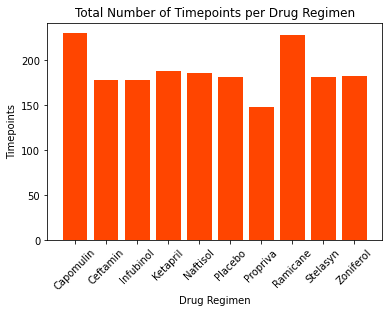

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Initialising lists that will be containing x and y axis
drug_name = []
total_tp_per_drug = []

# Grouping the data by Drug Regimen
group_by_drug = mouse_study_clean_df.groupby("Drug Regimen", as_index = False)
# Count the total amount of timepoints per drug
count_total_tp_per_drug = group_by_drug["Timepoint"].count()

# Appending data to lists 
total_tp_per_drug = count_total_tp_per_drug["Timepoint"].tolist()
drug_name = count_total_tp_per_drug["Drug Regimen"].tolist()

# Putting placeholders in for x axis
x_axis = np.arange(0,len(drug_name))
tick_locations = []
# Appending tick_locations list with the placeholders in x axis
for x in x_axis:
    tick_locations.append(x)

# Plotting
plt.bar(x_axis, total_tp_per_drug, facecolor = "orangered", align = "center") 
plt.xticks(tick_locations, drug_name, rotation = 45)
plt.title("Total Number of Timepoints per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')
plt.show()

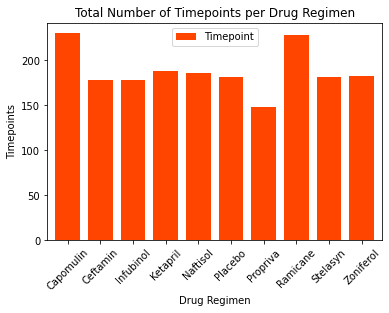

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Selecting a subset of count_total_tp_per_drug containing the 2 columns of interest
drug_and_tumor = count_total_tp_per_drug[["Drug Regimen","Timepoint"]]
# Setting the Drug Regimen column as index
drug_and_tumor = drug_and_tumor.set_index("Drug Regimen")

# Plotting
drug_and_tumor_plot = drug_and_tumor.plot(kind="bar",color = "orangered", title = "Total Number of Timepoints per Drug Regimen", width = 0.75, rot = 45)
drug_and_tumor_plot.set_ylabel("Timepoints")

plt.show()

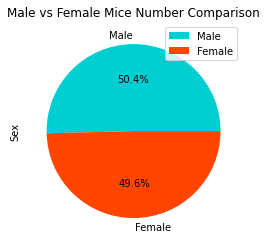

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Labels for each slice of the pie
labels = ["Males", "Females"]
# Dropping duplicates of mice
mice_after_drop_duplicates = mouse_study_clean_df.drop_duplicates(subset=["Mouse ID"])

# Plot
sex_pie = mice_after_drop_duplicates.value_counts("Sex").plot(kind = "pie" , y = "Sex", colors = ["darkturquoise","orangered"], autopct='%1.1f%%', title = ("Male vs Female Mice Number Comparison"),legend = True)
plt.ylabel("Sex")
plt.show()

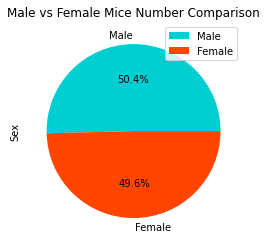

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Counting number of male mice
number_of_males = mice_after_drop_duplicates["Sex"].value_counts()["Male"]
# Counting number of female mice
number_of_females = mice_after_drop_duplicates["Sex"].value_counts()["Female"]
my_labels = ["Male","Female"]
sizes = [number_of_males,number_of_females]
my_colors = ["darkturquoise","orangered"]

plt.pie(sizes, labels = my_labels, colors = my_colors, autopct = "%1.1f%%")
plt.legend()
plt.ylabel("Sex")
plt.title("Male vs Female Mice Number Comparison")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

group_by_mouse_id= mouse_study_clean_df.groupby("Mouse ID")
max_timepoint = group_by_mouse_id["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_mouse_clean_last_timepoint_df = pd.merge(max_timepoint,mouse_study_clean_df, on = ["Mouse ID","Timepoint"], how = "left")
merge_mouse_clean_last_timepoint_df 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

# Creating a dictionary with the drug names as the key items and initialising their associated empty lists
tumor_volume_at_final_time_point_dict = {"Capomulin":[],"Ramicane":[],"Infubinol":[],"Ceftamin":[]}


# Appending data to lists per key item in dictionary to fill with tumor vol data (for plotting)
capomulin_data = merge_mouse_clean_last_timepoint_df.loc[merge_mouse_clean_last_timepoint_df["Drug Regimen"] == "Capomulin"]
tumor_volume_at_final_time_point_dict["Capomulin"] = capomulin_data["Tumor Volume (mm3)"].tolist()

ramicane_data = merge_mouse_clean_last_timepoint_df.loc[merge_mouse_clean_last_timepoint_df["Drug Regimen"] == "Ramicane"]
tumor_volume_at_final_time_point_dict["Ramicane"] = ramicane_data["Tumor Volume (mm3)"].tolist()

infubinol_data = merge_mouse_clean_last_timepoint_df.loc[merge_mouse_clean_last_timepoint_df["Drug Regimen"] == "Infubinol"]
tumor_volume_at_final_time_point_dict["Infubinol"] = infubinol_data["Tumor Volume (mm3)"].tolist()

ceftamin_data = merge_mouse_clean_last_timepoint_df.loc[merge_mouse_clean_last_timepoint_df["Drug Regimen"] == "Ceftamin"]
tumor_volume_at_final_time_point_dict["Ceftamin"] = ceftamin_data["Tumor Volume (mm3)"].tolist()



In [36]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_tumor_vol = capomulin_data["Tumor Volume (mm3)"]
ramicane_tumor_vol = ramicane_data["Tumor Volume (mm3)"]
infubinol_tumor_vol = infubinol_data ["Tumor Volume (mm3)"]
ceftamin_tumor_vol = ceftamin_data["Tumor Volume (mm3)"]
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
# Initialising outlier lists    
cap_outliers = []
ram_outliers = []
inf_outliers = []
cef_outliers = []

# Quartile calculations
cap_quartiles = capomulin_tumor_vol.quantile([0.25,0.5,0.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

# Looking for potential outliers 
cap_outliers_low = (capomulin_tumor_vol < cap_lower_bound)
cap_outliers_high = (capomulin_tumor_vol > cap_upper_bound)

# Appending the potential outliers to a list
cap_outliers = capomulin_tumor_vol[(cap_outliers_low | cap_outliers_high)].tolist()

# Printing the outliers
print(f'The potential outliers for Capomulin final tumor volumes are: {cap_outliers}')


# Quartile calculations
ram_quartiles = ramicane_tumor_vol.quantile([0.25,0.5,0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

# Looking for potential outliers 
ram_outliers_low = (ramicane_tumor_vol < ram_lower_bound)
ram_outliers_high = (ramicane_tumor_vol > ram_upper_bound)

# Appending the potential outliers to a list
ram_outliers = ramicane_tumor_vol[(ram_outliers_low | ram_outliers_high)].tolist()

# Printing the outliers
print(f'The potential outliers for Ramicane final tumor volumes are: {inf_outliers}')


# Quartile calculations
inf_quartiles = infubinol_tumor_vol.quantile([0.25,0.5,0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

# Looking for potential outliers 
inf_outliers_low = (infubinol_tumor_vol < inf_lower_bound)
inf_outliers_high = (infubinol_tumor_vol > inf_upper_bound)

# Appending the potential outliers to a list
inf_outliers = infubinol_tumor_vol[(inf_outliers_low | inf_outliers_high)].tolist()

# Printing the outliers
print(f'The potential outliers for  Infubinol final tumor volumes are: {inf_outliers}')


# Quartile calculations
cef_quartiles = ceftamin_tumor_vol.quantile([0.25,0.5,0.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

# Looking for potential outliers 
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

# Looking for potential outliers 
cef_outliers_low = (ceftamin_tumor_vol < cef_lower_bound)
cef_outliers_high = (ceftamin_tumor_vol > cef_upper_bound)

# Appending the potential outliers to a list
cef_outliers = ceftamin_tumor_vol[(cef_outliers_low | cef_outliers_high)].tolist()

# Printing the outliers
print(f'The potential outliers for  Ceftamin final tumor volumes are: {cef_outliers}')

print(f'The only outlier I found was: {inf_outliers}') 

The potential outliers for Capomulin final tumor volumes are: []
The potential outliers for Ramicane final tumor volumes are: []
The potential outliers for  Infubinol final tumor volumes are: [36.3213458]
The potential outliers for  Ceftamin final tumor volumes are: []
The only outlier I found was: [36.3213458]


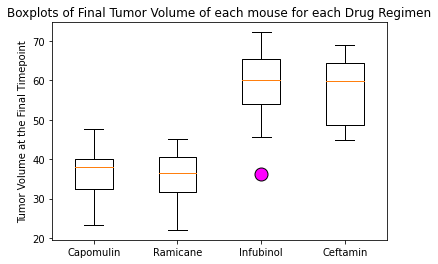

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_at_final_time_point_dict.values(),flierprops={'marker': 'o', 'markersize': 13, 'markerfacecolor': 'fuchsia'})
ax.set_xticklabels(tumor_volume_at_final_time_point_dict.keys())
ax.set_ylabel("Tumor Volume at the Final Timepoint (mm3)")
ax.set_title("Boxplots of Final Tumor Volume of each mouse for each Drug Regimen")
plt.show()

## Line and Scatter Plots

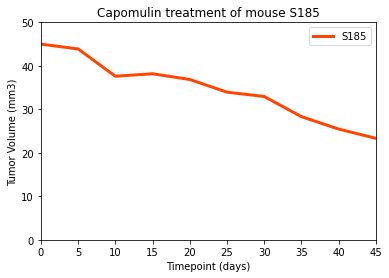

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse_df = mouse_study_clean_df.loc[mouse_study_clean_df["Drug Regimen"] == "Capomulin"]

# Choosing a random Capomulin mouse
s185_data = mouse_study_clean_df.loc[mouse_study_clean_df["Mouse ID"] == "s185"]

# Initialising lists to store x and y axis data
s185_tumor_volume = []
s185_timepoint = []

# Appending data to lists
s185_tumor_volume = s185_data["Tumor Volume (mm3)"].tolist()
s185_timepoint = s185_data["Timepoint"].tolist()

# Plot
plt.plot(s185_timepoint,s185_tumor_volume, color = "orangered", label = "S185", linewidth = 3)

plt.title("Capomulin treatment of mouse S185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,45)
plt.ylim(0,50)
plt.legend(loc = "best")
plt.show()

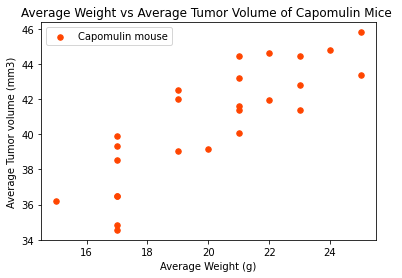

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Initialising lists to hold x and y axis data
average_weight_Capomulin_mouse = []
average_tumor_volume_Capomulin_mouse = []

# Creating a subset of Capomulin mice only
Capomulin_mouse_df = mouse_study_clean_df.loc[mouse_study_clean_df["Drug Regimen"] == "Capomulin"]
group_by_volume_each_Capomulin_mouse = Capomulin_mouse_df.groupby("Mouse ID")

# Finding the average tumor volume and weight of each Capomulin mouse
average_tumor_volume_each_Capomulin_mouse = group_by_volume_each_Capomulin_mouse["Tumor Volume (mm3)"].mean()
average_weight_each_Capomulin_mouse = group_by_volume_each_Capomulin_mouse["Weight (g)"].mean()

# Appending them to their respective lists
average_weight_Capomulin_mouse = average_weight_each_Capomulin_mouse.tolist()
average_tumor_volume_Capomulin_mouse = average_tumor_volume_each_Capomulin_mouse.tolist()

# Plot
plt.scatter(x = average_weight_Capomulin_mouse,y = average_tumor_volume_Capomulin_mouse, marker = "o", s = 30, color = "orangered", label = "Capomulin mouse" )
plt.title("Average Weight vs Average Tumor Volume of Capomulin Mice ")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.legend(loc = "best")
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Finding the Pearson r value
correlation = st.pearsonr(average_weight_Capomulin_mouse,average_tumor_volume_Capomulin_mouse)
round(correlation[0],2)

0.84

In [46]:
# Putting together the regression line
x_values = average_weight_each_Capomulin_mouse
y_values = average_tumor_volume_each_Capomulin_mouse
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

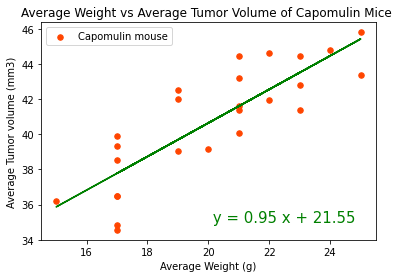

In [48]:
# Plot the Capomulin mice data with the regression line on it
plt.scatter(x = average_weight_each_Capomulin_mouse,y = average_tumor_volume_Capomulin_mouse, marker = "o", s = 30, color = "orangered", label = "Capomulin mouse" )
plt.plot(x_values,regress_values,"green")
plt.annotate(line_eq, (20,35), fontsize = 15, color = "green")
plt.title("Average Weight vs Average Tumor Volume of Capomulin Mice ")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.legend(loc = "best")
plt.show()

# Summary

By looking at the summary statistics table for the tumor volume (mm3) for each drug regimen, we can deduce that the data follow an almost perfect symmetrical distribution with almost no skew, since the mean and median are almost the same for each drug. We can also observe from looking at the graph of Average Weight vs Average Tumor Volume of Capomulin mice that there is a positive correlation between weight and tumor volume of each mouse.  By observing the pie chart of the sex of the mice, we can observe that the number of female and male mice are almost the same in the data set.